<a href="https://colab.research.google.com/github/Naduli48/Telco_customer_churn_prediction/blob/main/Telco_customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #to display plots
import seaborn as sns #for create plots

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Read the data
df = pd.read_csv('/content/drive/MyDrive/ML/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#number of columns and rows
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
#Since the total charges column is categorical, it needs to be changed to a numerical format.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
 #errors = 'coerce' argumebt tells pandas to replace any string that cannot be concerted to a number with NaN.

In [8]:
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)
# The rows that are NaN are the new customers. Fill them with median

/tmp/ipython-input-3194511606.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)


In [9]:
#customer ID has no predictive value
df.drop(columns = ['customerID'], inplace=True)

In [11]:
#Replace 'no' with specific terms, such as 'no internet service,' etc.
service_cols = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for col in service_cols:
  df[col] = df[col].replace('No internet service','No')

df['MultipleLines'] = df['MultipleLines'].replace('No phone service','No')

In [12]:
#dupliacte rows
df.duplicated().sum()

np.int64(22)

In [13]:
print(f"Original number of rows: {len(df)}")

# Remove duplicate rows, keeping the first occurrence
df.drop_duplicates(inplace=True)

print(f"Number of rows after removing duplicates: {len(df)}")

Original number of rows: 7043
Number of rows after removing duplicates: 7021


Churn count : 
 Churn
No     5164
Yes    1857
Name: count, dtype: int64

churn_percentage : 
 Churn
No     73.550776
Yes    26.449224
Name: proportion, dtype: float64


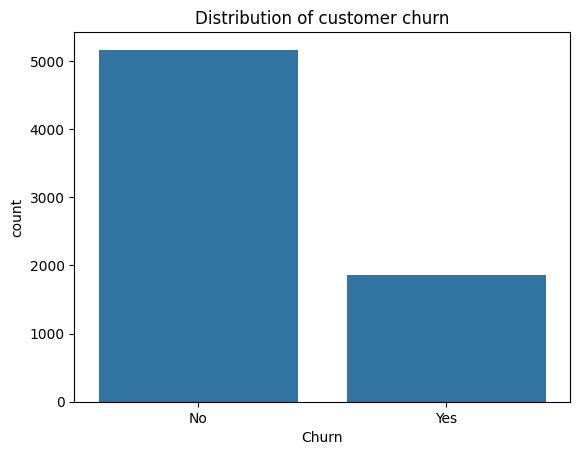

In [14]:
#Display churn count and Churn percentage
churn_count = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True)*100

print("Churn count : \n",churn_count)
print("\nchurn_percentage : \n",churn_percentage)

sns.countplot(x='Churn',data=df)
plt.title("Distribution of customer churn")
plt.show()

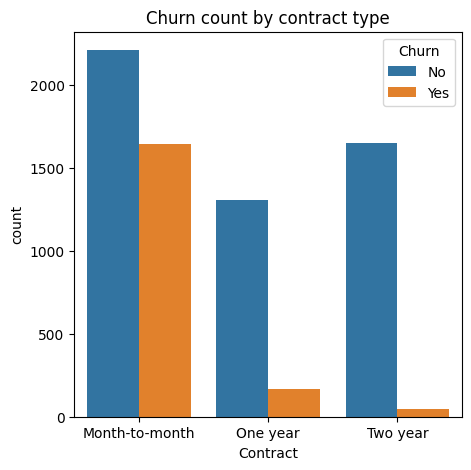

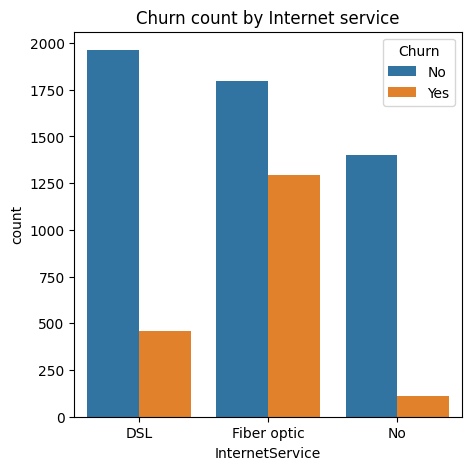

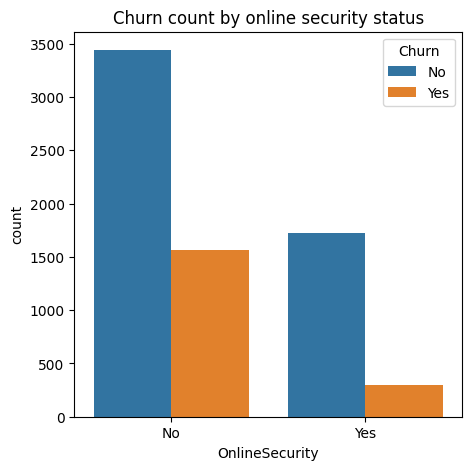

In [16]:
#Catatgorical vs Churn
#Churn according to contract type
plt.figure(figsize=(5,5))
sns.countplot(x = "Contract", hue = "Churn", data= df)
plt.title("Churn count by contract type")
plt.show()

#Churn according to internet service
plt.figure(figsize=(5,5))
sns.countplot(x = "InternetService", hue = "Churn", data= df)
plt.title("Churn count by Internet service")
plt.show()

#Churn according to online security
plt.figure(figsize=(5,5))
sns.countplot(x = "OnlineSecurity", hue = "Churn", data= df)
plt.title("Churn count by online security status")
plt.show()

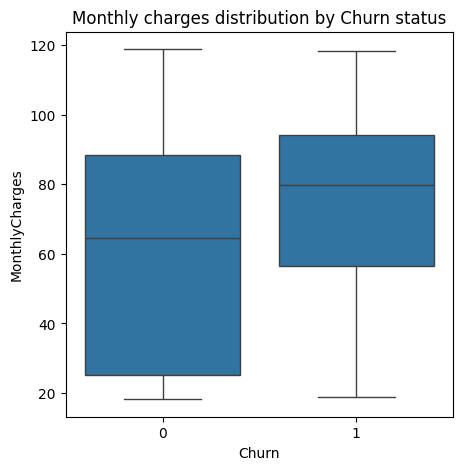

In [18]:
#Numerical vs Churn
#Churn according to online security
plt.figure(figsize=(5,5))
sns.boxplot(x = "Churn", y = "MonthlyCharges", data= df)
plt.title("Monthly charges distribution by Churn status")
plt.show()

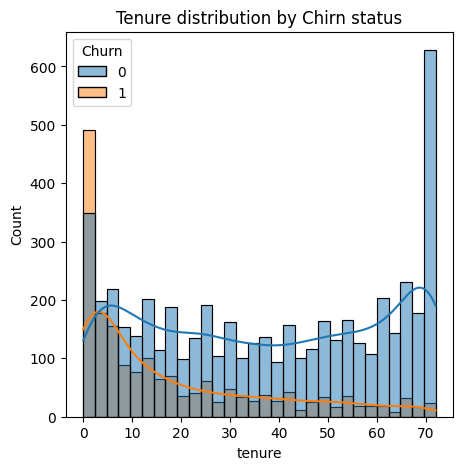

In [19]:
#Tenure (duration of the customer)
plt.figure(figsize=(5,5))
sns.histplot(x = "tenure", hue = "Churn", data= df,  kde = True, bins = 30)
plt.title("Tenure distribution by Chirn status")
plt.show()

In [20]:
#convert yes/ no to 1/0 for correlato matrix
df['Churn'] = df['Churn'].replace({'Yes':1, 'No':0})

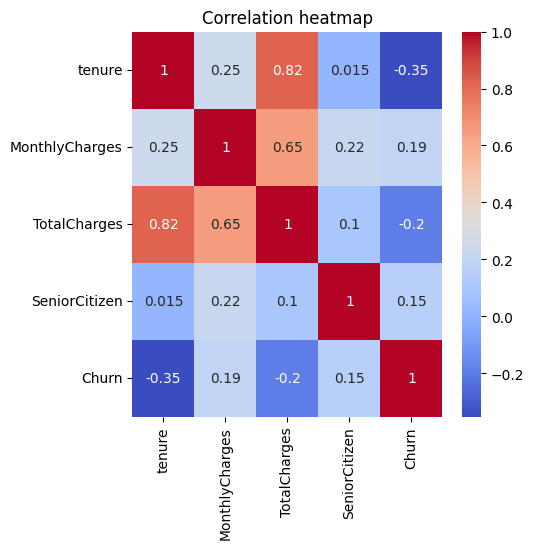

In [21]:
#correlation matrix
plt.figure(figsize=(5,5))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges','SeniorCitizen','Churn']].corr(),annot = True, cmap = 'coolwarm')
plt.title('Correlation heatmap')
plt.show()

In [23]:
#Outlier detection(IQR method)
for col in ['MonthlyCharges','TotalCharges']:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  upper_bound = Q3 +1.5 *IQR

  df[col] = np.where(df[col]>upper_bound, upper_bound,df[col])
print("Outlier capping applied to : MonthlyCharges, TotalCharges")

Outlier capping applied to : MonthlyCharges, TotalCharges


In [24]:
# --- Step 1: Final Preprocessing (Encoding and Scaling) ---
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 1. Label Encoding for Binary Categorical Columns (already done for Churn)
# Identify binary columns that still need encoding (excluding the columns simplified earlier)
binary_cols_to_encode = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in binary_cols_to_encode:
    # We use LabelEncoder for object type columns
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# 2. One-Hot Encoding for Multi-Category Columns
multi_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
              'Contract', 'PaymentMethod']

# Use get_dummies for One-Hot Encoding. drop_first=True reduces multicollinearity.
df_encoded = pd.get_dummies(df, columns=multi_cols, drop_first=True)

# 3. Separate Features (X) and Target (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# 4. Split data into Training and Testing sets (Stratified to handle class imbalance)
# Use a 75/25 split. stratify=y ensures both sets have the same Churn ratio (approx 26.5%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# 5. Feature Scaling (Crucial for Neural Network)
# Identify Numerical Columns for Scaling
scaling_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize and Fit Scaler
scaler = StandardScaler()
# Fit scaler ONLY on training data to prevent data leakage
scaler.fit(X_train[scaling_cols])

# Transform both Training and Testing data
X_train[scaling_cols] = scaler.transform(X_train[scaling_cols])
X_test[scaling_cols] = scaler.transform(X_test[scaling_cols])

print("Preprocessing (Encoding and Scaling) Complete.")
print(f"Final training set shape: {X_train.shape}")

Preprocessing (Encoding and Scaling) Complete.
Final training set shape: (5265, 23)


In [25]:
# --- Step 2: Decision Tree Model Implementation & Tuning ---
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report

# Define the parameter grid for hyperparameter tuning
dt_param_grid = {
    'max_depth': [3, 5, 7, 9],            # Depth controls model complexity and prevents overfitting
    'min_samples_split': [2, 10, 20],     # Minimum number of samples required to split an internal node
    'criterion': ['gini', 'entropy']      # Function to measure the quality of a split
}

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize Grid Search with 5-fold Cross-Validation (cv=5)
# Scoring is set to 'roc_auc' due to class imbalance
dt_grid = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model and perform tuning on the training data
dt_grid.fit(X_train, y_train)

# Get the best model
best_dt_model = dt_grid.best_estimator_

print("\nDecision Tree Best Parameters:", dt_grid.best_params_)
print("Decision Tree Best AUC Score (on Cross-Validation):", dt_grid.best_score_)

# Evaluation on Test Set
dt_predictions = best_dt_model.predict(X_test)
dt_proba = best_dt_model.predict_proba(X_test)[:, 1]

print("\n--- Decision Tree Test Set Results ---")
print("AUC Score:", roc_auc_score(y_test, dt_proba))
print("Classification Report:\n", classification_report(y_test, dt_predictions))


Decision Tree Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Decision Tree Best AUC Score (on Cross-Validation): 0.8236547738053618

--- Decision Tree Test Set Results ---
AUC Score: 0.8269256432155441
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1292
           1       0.64      0.48      0.55       464

    accuracy                           0.79      1756
   macro avg       0.74      0.69      0.71      1756
weighted avg       0.78      0.79      0.78      1756

